# Logistic Regression

首先检查数据

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path ='ex2data1.txt'
data =pd.read_csv(path,header=None,names=['Exam 1','Exam 2','Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


可视化数据

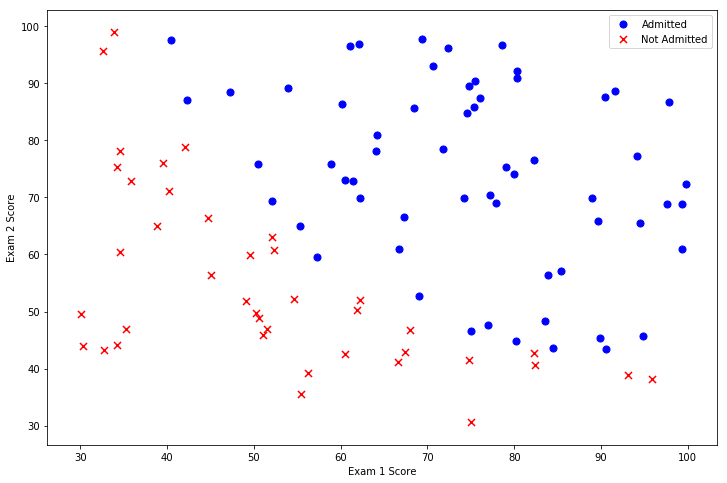

In [7]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig,ax =plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=50,c='r',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

# sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\]

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

看看这函数效果怎么样！！！

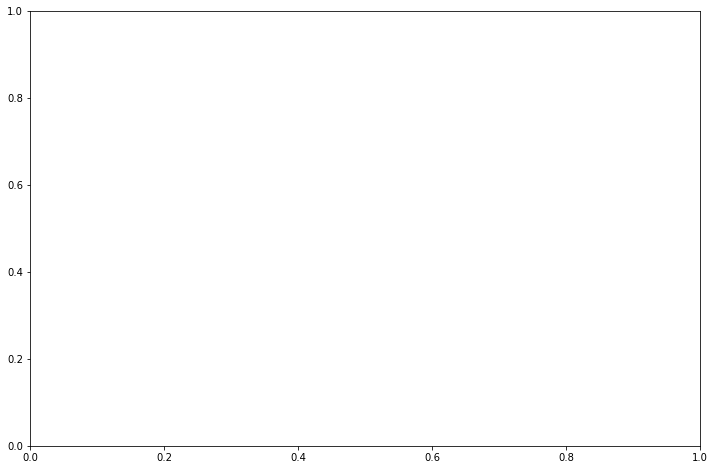

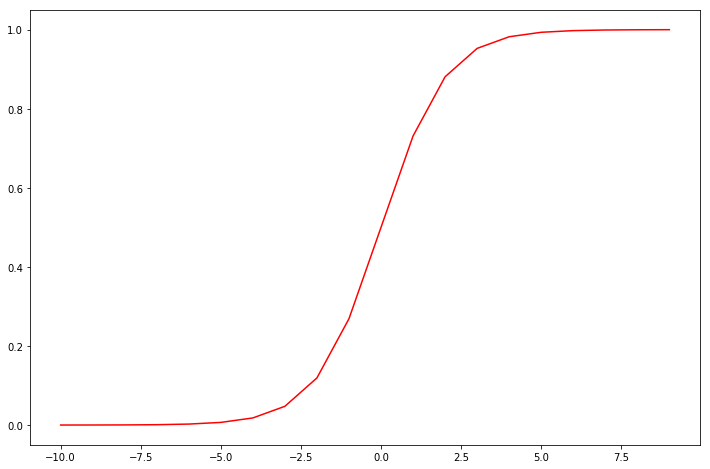

In [11]:
nums = np.arange(-10,10,step=1)

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(nums,sigmoid(nums),'r')
plt.show()

## 代价函数：

$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$

In [12]:
def cost(theta,X,y):
    theta = np.matrix(theta)
    X= np.matrix(X)
    y= np.matrix(y)
    first =np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second =np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first - second)/ (len(X))


将数据设置为 向量形式，方便运算

In [13]:
data.insert(0,'Ones',1)
data.head()

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [20]:
cols =data.shape[1]  # cols =4
X =data.iloc[:,0:cols-1]# 取前3列数据
y =data.iloc[:,cols-1:cols]#取最后一列数据

X =np.array(X.values)
y =np.array(y.values)
theta =np.zeros(3)

In [21]:
theta

array([0., 0., 0.])

检查矩阵维度 

In [23]:
X.shape ,theta.shape, y.shape

((100, 3), (3,), (100, 1))

计算初始theta=0 时的cost function 

In [24]:
cost(theta ,X,y)

0.6931471805599453

然后  梯度下降 

# gradient descent 
* 这是批量梯度下降（batch gradient descent）  
* 转化为向量化计算： $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [34]:
def gradient(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error =sigmoid(X * theta.T) -y
    for i in range(parameters):
        term = np.multiply(error,X[:,i])
        grad[i]=np.sum(term)/len(X)
    return grad 

此处并没有执行梯度下降，python 中有专门的优化函数，我们只需写一个步长下的下降函数

In [35]:
gradient(theta ,X,y)

array([ -0.1       , -12.00921659, -11.26284221])

# 拟合参数（用python快速拟合参数,省时省力）
> * 这里使用 [`scipy.optimize.minimize`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) 去寻找参数  

In [36]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(X,y))

In [37]:
result

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

看看在快速拟合下的损失函数是什么

In [38]:
cost(result[0],X,y)

0.20349770158947425

接下来，我们需要编写一个函数，用我们所学的参数theta来为数据集X输出预测。然后，我们可以使用这个函数来给我们的分类器的训练精度打分。
逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 
当${{h}_{\theta }}$大于等于0.5时，预测 y=1

当${{h}_{\theta }}$小于0.5时，预测 y=0 。

In [39]:
def predict(theta,X):
    probability = sigmoid(X*theta.T)
    return [1 if x>=0.5 else 0 for  x in probability]

In [41]:
theta_min  = np.matrix(result[0])
predictions = predict(theta_min,X)
correct =[1 if ((a==1 and b==1) or (a==0 and b== 0)) else 0 for (a,b)in zip(predictions,y)]
accuracy =(sum(map(int,correct))%len(correct))
print ('accuracy ={0}%'.format(accuracy))

accuracy =89%


## 正则化逻辑回归

额  可能会有点懵，正则化逻辑回归就是减少参数 theta ！ 先提一嘴，然后下面就懂了 

可视化数据

In [42]:
path ='ex2data2.txt'

In [43]:
data2=pd.read_csv(path,header=None, names=['Test 1','Test 2','Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


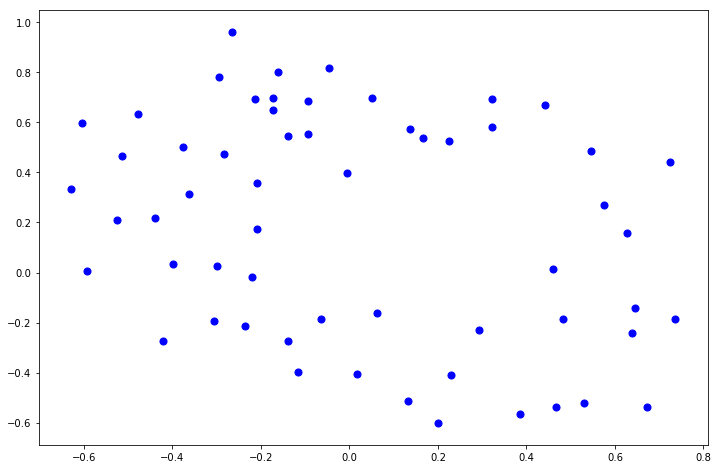

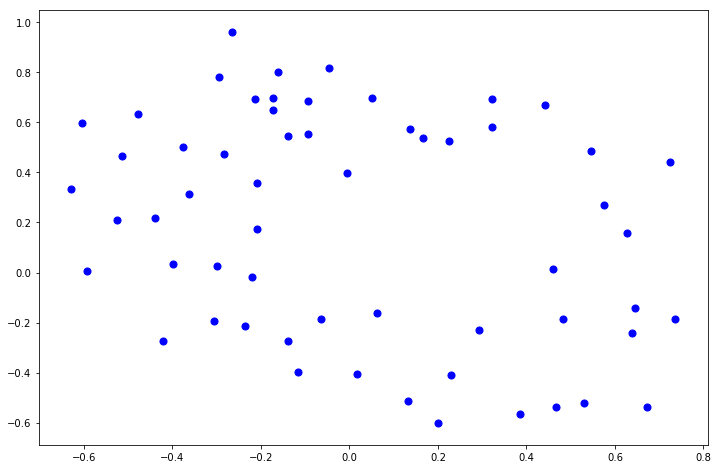

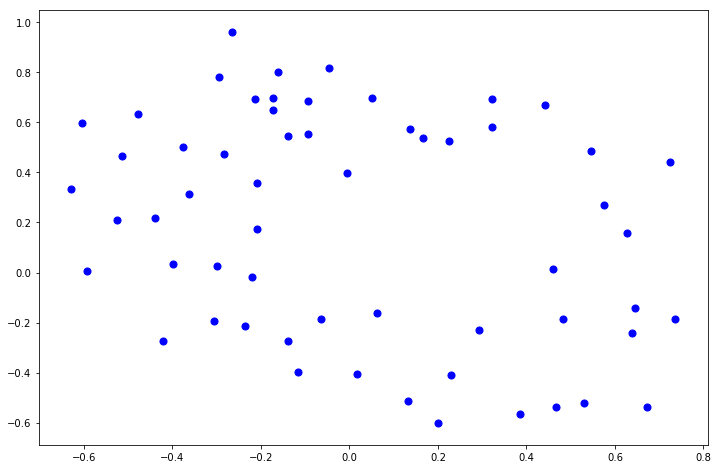

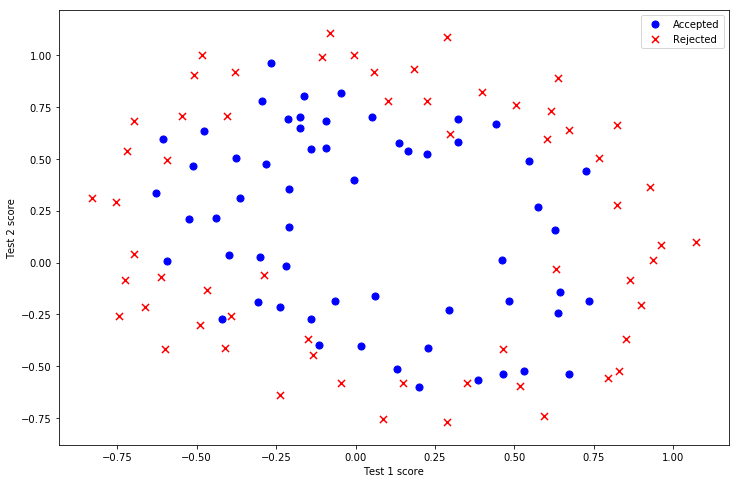

In [47]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig ,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'],positive['Test 2'],s=50,c='b',marker='o',label='Accepted')
ax.scatter(negative['Test 1'],negative['Test 2'],s=50,c='r',marker='x',label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 score')
ax.set_ylabel('Test 2 score')
plt.show()

这个分类是没有线性决策界限，通过构造多项式解决

1 >>> x1 = range(6)
2 >>> x1
3 [0, 1, 2, 3, 4, 5]
4 >>> np.power(x1, 3)
5 array([  0,   1,   8,  27,  64, 125])

# feature mapping（特征映射）

polynomial expansion

```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```

In [48]:
degree =5
x1=data2['Test 1']
x2=data2['Test 2']

data2.insert(3,'Ones',1)

for i  in range(1,degree):
    for j in range(0,i):
        data2['F'+str(i)+str(j)]=np.power(x1,i-j)*np.power(x2,j)
        
data2.drop('Test 1',axis=1,inplace=True)
data2.drop('Test 2',axis=1,inplace=True)

data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


# regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [64]:
def costReg(theta,X,y,learningRate):
    theta =np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    reg=(learningRate /(2*len(X)))*int(theta*theta.T)
    return np.sum(first -second)/len(X) +reg

请注意等式中的"reg" 项。还注意到另外的一个“学习率”参数。这是一种超参数，用来控制正则化项。现在我们需要添加正则化梯度函数：

如果我们要使用梯度下降法令这个代价函数最小化，因为我们未对${{\theta }_{0}}$ 进行正则化，所以梯度下降算法将分两种情形：
\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}} \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align}

对上面的算法中 j=1,2,...,n 时的更新式子进行调整可得： 
${{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}$

In [67]:
def gradientReg(theta,X,y,learningRate):
    theta = np.matrix(theta)
    X= np.matrix(X)
    y= np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X*theta.T)-y
    
    for i in range(parameters):
        term = np.multiply(error,X[:,i])
        
        if (i==0):
            grad[i] = np.sum(term)/len(X)
        else:
            grad[i] = (np.sum(term)/len(X))+((learningRate/len(X))*theta[:,i])
            
    return grad


In [68]:
# init X and y 
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)


测试所写函数正确性

In [69]:
learningRate =1

In [70]:
costReg(theta2,X2,y2,learningRate)

0.6931471805599454

In [71]:
gradientReg(theta2,X2,y2,learningRate)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

相同的套路应用于正则化中

In [72]:
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
result2

(array([ 0.53070798,  0.2915905 , -1.61043247, -0.58237424,  0.01615714,
        -0.21260327, -0.40181821, -1.36892015,  0.02274358, -0.94999674,
         0.0338981 ]), 49, 4)

In [73]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 78%


虽然我们实现了这些算法，值得注意的是，我们还可以使用高级Python库像scikit-learn来解决这个问题。

In [77]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2',C=1.0)
model.fit(X2,y2.ravel())

F:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
model.score(X2,y2)

0.6610169491525424